<a href="https://colab.research.google.com/github/nuraimandanial/notebooks/blob/main/Lab%20Work%202%20-%20Wine%20Classification%20using%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Work 2 - Wine Prediction in Neural Network

## Library & Dataset Import
Import all needed Library from Python

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

from sklearn.model_selection import (train_test_split)
from sklearn.preprocessing import (StandardScaler)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

import tensorflow as tf
from tensorflow import keras
from keras import (
    layers,
    optimizers
)

In [3]:
from google.colab import drive
drive.mount('/content/drive')
!pwd

Mounted at /content/drive
/content


In [4]:
csv = [
    ['/content/drive/MyDrive/Colab Notebooks/LAB WORK 2/winequality-red.csv', 'Red Wine'],
    ['/content/drive/MyDrive/Colab Notebooks/LAB WORK 2/winequality-white.csv', 'White Wine']
]

## Data Preparation
Preprocess the wine datasets for any null value, merge and get the datasets description.

### Red and White Wine Dataset Preprocessing

In [5]:
whiteData = pd.read_csv(csv[0][0], delimiter=';')
redData = pd.read_csv(csv[1][0], delimiter=';')

In [6]:
whiteData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
whiteData.info()
print(whiteData.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides             

In [8]:
redData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
redData.info()
print(redData.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides             

### Histogram Plotting for Distribution of Alcohol & Datasets Pairplot

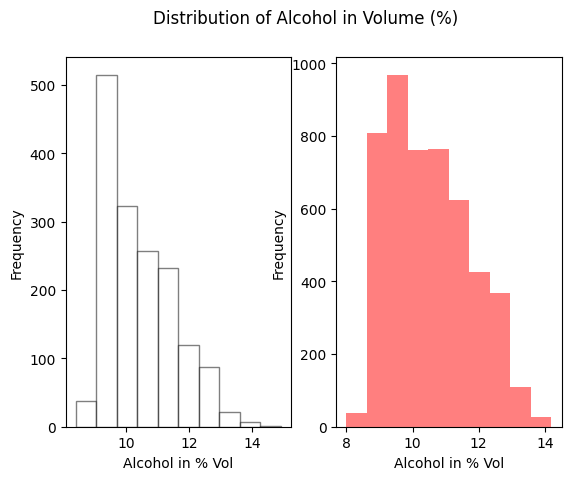

In [10]:
fig, ax = plt.subplots(1, 2)

ax[0].hist(whiteData.alcohol, 10, facecolor='white', ec='black', alpha=0.5, label='White Wine')
ax[1].hist(redData.alcohol, 10, facecolor='red', alpha=0.5, label='Red Wine')

# fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
fig.suptitle('Distribution of Alcohol in Volume (%)')

plt.show()

In [11]:
sns.pairplot(data=whiteData, diag_kind='kde')

In [12]:
sns.pairplot(data=redData, diag_kind='kde')

### Datasets Merging & Preprocessing

In [13]:
whiteData['Wine Type'] = 0
redData['Wine Type'] = 1

mergeData = pd.concat([whiteData, redData], ignore_index=True)

In [14]:
mergeData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [15]:
mergeData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine Type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


## Model Development

In [16]:
X = mergeData.drop('Wine Type', axis=1)
y = mergeData['Wine Type']

X_train, X_validation_test, y_train, y_validation_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)

print('Training Set Shape : ', X_train.shape)
print('Validation Set Shape : ', X_validation.shape)
print('Testing Set Shape : ', X_test.shape)

Training Set Shape :  (4547, 12)
Validation Set Shape :  (975, 12)
Testing Set Shape :  (975, 12)


In [17]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_validation = scaler.transform(X_validation)

### Neural Network Architecture

In [18]:
class modelChooser:
  def constructor(self, number):
    modelConst =  getattr(self, 'model_' + str(number))
    return modelConst()
  
  @staticmethod
  def model_1():
    return keras.Sequential([
      layers.Dense(128, activation='relu', input_shape=(X_train.copy().shape[1],)),
      layers.Dense(64, activation='relu'),
      layers.Dense(1, activation='softmax')
    ])

  @staticmethod
  def model_2():
    return keras.Sequential([
      layers.Dense(256, activation='relu', input_shape=(X_train.copy().shape[1],)),
      layers.Dropout(0.2),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(1, activation='sigmoid')
    ])

  @staticmethod
  def model_3():
    return keras.Sequential([
      layers.Dense(64, activation='relu', input_shape=(X_train.copy().shape[1],)),
      layers.Dense(128, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(1, activation='sigmoid')
    ])

  @staticmethod
  def model_4():
    return keras.Sequential([
      layers.Dense(128, activation=layers.LeakyReLU(alpha=0.2), input_shape=(X_train.copy().shape[1],)),
      layers.Dense(64, activation=layers.LeakyReLU(alpha=0.2)),
      layers.Dense(1, activation='sigmoid')
    ])

  @staticmethod
  def model_5():
    return keras.Sequential([
      layers.Dense(256, activation='tanh', input_shape=(X_train.copy().shape[1],)),
      layers.BatchNormalization(),
      layers.Dense(128, activation='tanh'),
      layers.BatchNormalization(),
      layers.Dense(1, activation='sigmoid')
    ])


----------------------------------------------------------
Model Number : 1
Test Accuracy : 0.745
Train Accuracy : 0.759
Validation Accuracy : 0.741


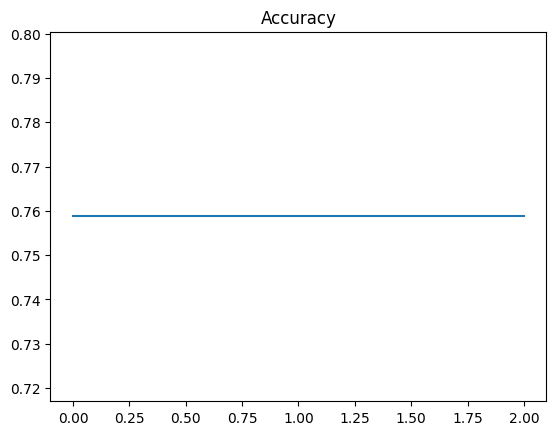

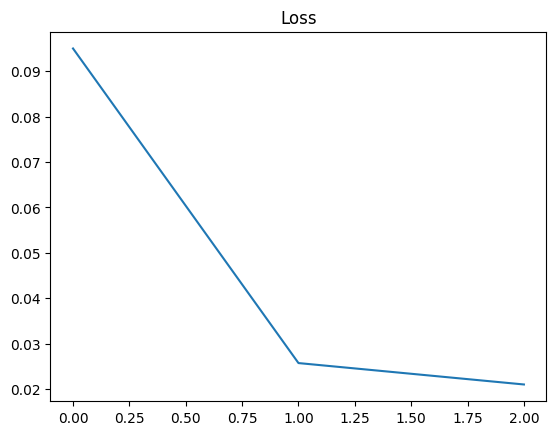

----------------------------------------------------------
Model Number : 2
Test Accuracy : 0.996
Train Accuracy : 0.997
Validation Accuracy : 0.993


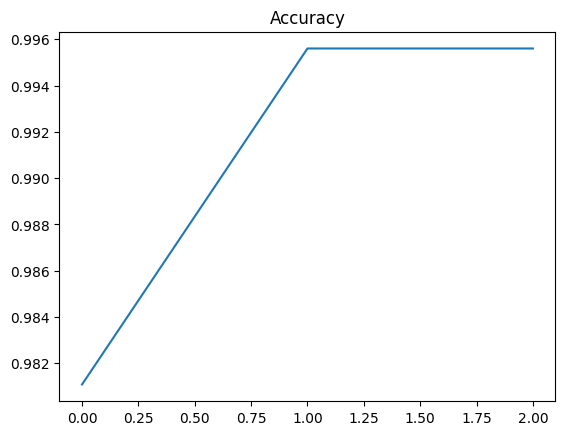

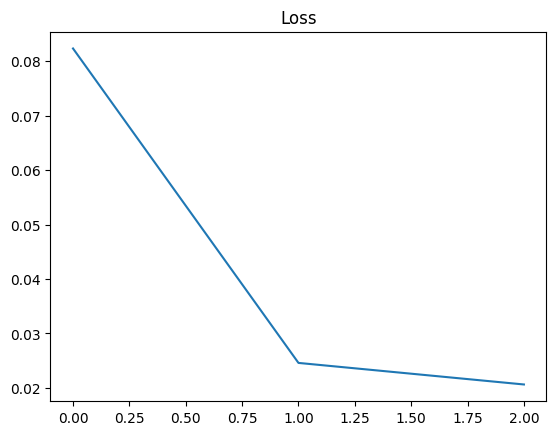

----------------------------------------------------------
Model Number : 3
Test Accuracy : 0.994
Train Accuracy : 0.996
Validation Accuracy : 0.991


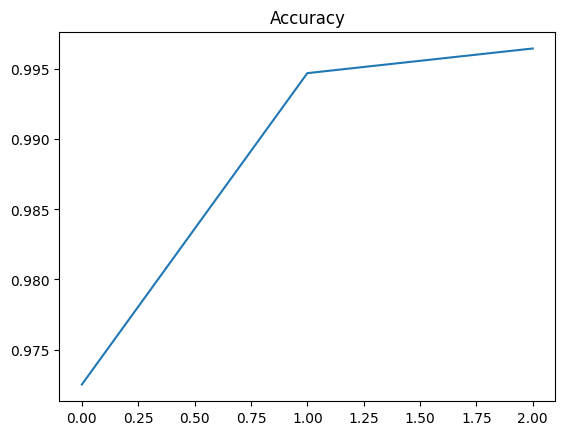

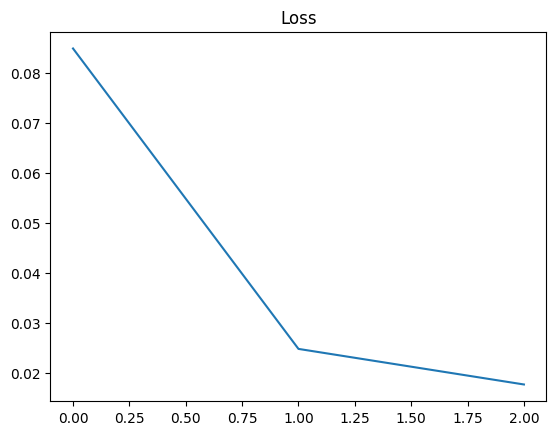

----------------------------------------------------------
Model Number : 4
Test Accuracy : 0.996
Train Accuracy : 0.997
Validation Accuracy : 0.994


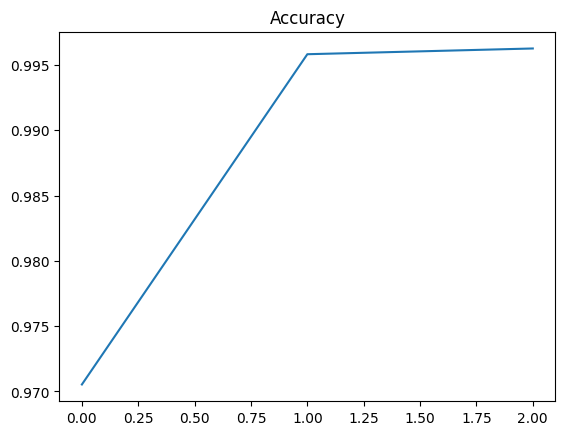

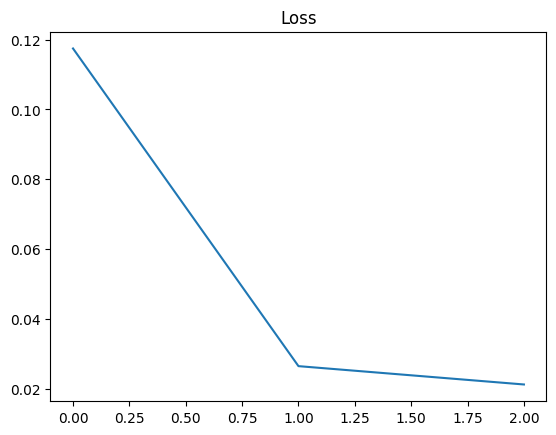

----------------------------------------------------------
Model Number : 5
Test Accuracy : 0.996
Train Accuracy : 0.998
Validation Accuracy : 0.994


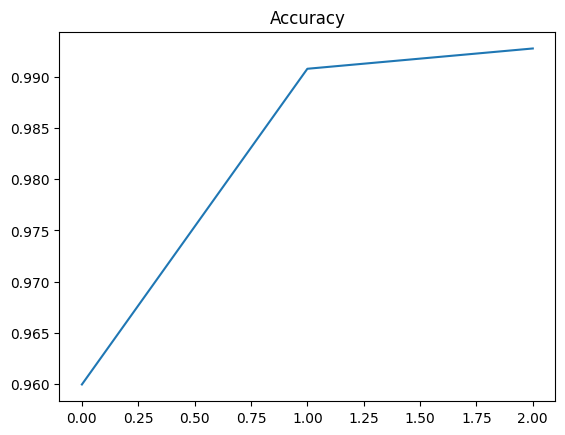

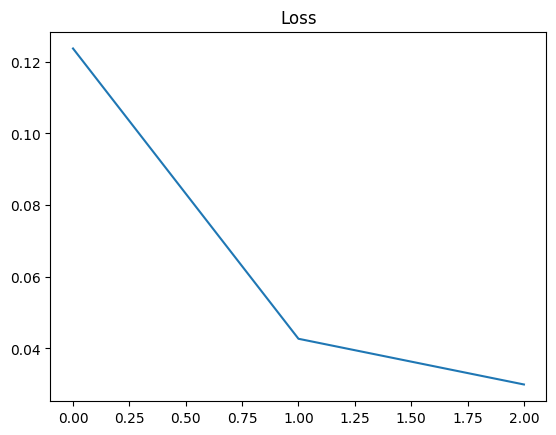

----------------------------------------------------------


In [19]:
%matplotlib inline

print('----------------------------------------------------------')
for i in range(1, 6):
  X_tr = copy.deepcopy(X_train)
  X_val = copy.deepcopy(X_validation)
  X_ts = copy.deepcopy(X_test)

  y_tr = copy.deepcopy(y_train)
  y_val = copy.deepcopy(y_validation)
  y_ts = copy.deepcopy(y_test)

  print('Model Number : ' + str(i))
  model = modelChooser().constructor(i)

  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  history = model.fit(X_tr, y_tr, epochs=3, verbose=0, validation_data=(X_val, y_val))
  
  loss, acc = model.evaluate(X_ts, y_ts, verbose=0)
  print('Test Accuracy : %.3f' % acc)
  loss, acc = model.evaluate(X_tr, y_tr, verbose=0)
  print('Train Accuracy : %.3f' % acc)
  loss, acc = model.evaluate(X_val, y_val, verbose=0)
  print('Validation Accuracy : %.3f' % acc)

  plt.plot(history.history['accuracy'], label='train')
  plt.title('Accuracy')
  plt.show()

  plt.plot(history.history['loss'], label='train')
  plt.title('Loss')
  plt.show()
  
  print('----------------------------------------------------------')

## Model Tuning

### Hyperparameter Tuning

In [20]:
# Model 5 is the best neural architecture.

results = {
    'Activation' : [], 'Learning Rate' : [], 'Optimizer' : [],
    'Batch Size' : [], 'Hidden Layers' : [], 'Neurons per Layer' : [],
    'Accuracy' : [], 'Precision' : [], 'Recall' : [], 'F1 Score' : []
}

def train_evaluate_model(activation, learning_rate, optimizer, batch_size, hidden_layers, neurons_per_layer):
  model = keras.Sequential()
  
  model.add(layers.Dense(neurons_per_layer, activation=activation, input_shape=(X_train.shape[1],)))
  model.add(layers.BatchNormalization())

  for _ in range(hidden_layers - 1):
    model.add(layers.Dense(neurons_per_layer, activation=activation))
    model.add(layers.BatchNormalization())

  model.add(layers.Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  model.fit(X_train, y_train, epochs=2, batch_size=batch_size, verbose=0)

  y_pred_prob = model.predict(X_validation)
  y_pred = (y_pred_prob > 0.5).astype(int)

  accuracy = accuracy_score(y_validation, y_pred)
  precision = precision_score(y_validation, y_pred)
  recall = recall_score(y_validation, y_pred)
  f1 = f1_score(y_validation, y_pred)

  return accuracy, precision, recall, f1
  

In [21]:
activations = ['tanh']
learning_rates = [0.1, 0.01, 0.001]
optimizers = ['adam', 'rmsprop', 'sgd']
batch_sizes = [20, 32, 64, 128]
hidden_layers = [1, 2, 3]
neurons_per_layer = [64, 128, 256]

for activation in activations:
  for learning_rate in learning_rates:
    for optimizer in optimizers:
      for batch_size in batch_sizes:
        for hidden_layer in hidden_layers:
          for neurons in neurons_per_layer:
            accuracy, precision, recall, f1 = train_evaluate_model(activation, learning_rate, optimizer, batch_size, hidden_layer, neurons)

            results['Activation'].append(activation)
            results['Learning Rate'].append(learning_rate)
            results['Optimizer'].append(optimizer)
            results['Batch Size'].append(batch_size)
            results['Hidden Layers'].append(hidden_layer)
            results['Neurons per Layer'].append(neurons)
            results['Accuracy'].append(accuracy)
            results['Precision'].append(precision)
            results['Recall'].append(recall)
            results['F1 Score'].append(f1)

resultsData = pd.DataFrame(results)

31/31 [==============================] - 0s 4ms/step


### Hyperparameter Results

In [33]:
# resultsData.to_csv('/content/drive/MyDrive/Colab Notebooks/LAB WORK 2/tuning_results.csv', index=False)
resultsData

,Activation,Learning Rate,Optimizer,Batch Size,Hidden Layers,Neurons per Layer,Accuracy,Precision,Recall,F1 Score
0,tanh,0.100,adam,20,1,64,0.988718,0.993065,0.991690,0.992377
1,tanh,0.100,adam,20,1,128,0.988718,0.993065,0.991690,0.992377
2,tanh,0.100,adam,20,1,256,0.986667,0.991678,0.990305,0.990991
3,tanh,0.100,adam,20,2,64,0.992821,0.993103,0.997230,0.995162
4,tanh,0.100,adam,20,2,128,0.993846,0.991758,1.000000,0.995862
...,...,...,...,...,...,...,...,...,...,...
319,tanh,0.001,sgd,128,2,128,0.927179,0.992436,0.908587,0.948662
320,tanh,0.001,sgd,128,2,256,0.956923,0.992754,0.948753,0.970255
321,tanh,0.001,sgd,128,3,64,0.952821,0.992711,0.943213,0.967330
322,tanh,0.001,sgd,128,3,128,0.957949,0.992764,0.950139,0.970984


## Model Evaluation

In [28]:
# The best hyperparameter tuning model is (tanh, 0.01, adam, 20, 3, 256)

best_model = keras.Sequential([
    layers.Dense(256, activation='tanh', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(256, activation='tanh'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='tanh'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='tanh'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

optimizer = optimizers.Adam(learning_rate=0.01)

best_model.compile(optimizer=optimizer,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
best_model.fit(X_train, y_train, batch_size=20, epochs=10, verbose=0, validation_data=(X_validation, y_validation))

loss, test_acc = best_model.evaluate(X_test, y_test)
print("Test Set Accuracy : %.4f" % test_acc)

loss, train_acc = best_model.evaluate(X_train, y_train)
print("Test Set Accuracy : %.4f" % train_acc)

loss, val_acc = best_model.evaluate(X_validation, y_validation)
print("Test Set Accuracy : %.4f" % val_acc)

31/31 [==============================] - 0s 5ms/step - loss: 0.0536 - accuracy: 0.9887
Test Set Accuracy : 0.9887
143/143 [==============================] - 1s 5ms/step - loss: 0.0271 - accuracy: 0.9947
Test Set Accuracy : 0.9947
31/31 [==============================] - 0s 3ms/step - loss: 0.0566 - accuracy: 0.9846
Test Set Accuracy : 0.9846


### Performance Validation

143/143 [==============================] - 2s 6ms/step


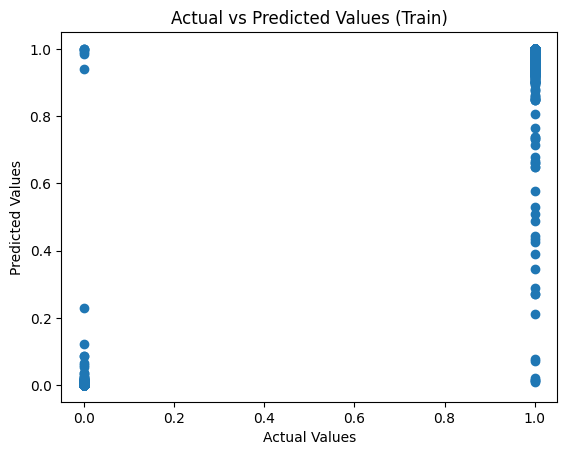

In [29]:
y_pred = best_model.predict(X_train)

plt.scatter(y_train, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Train)')

plt.show()

31/31 [==============================] - 0s 3ms/step


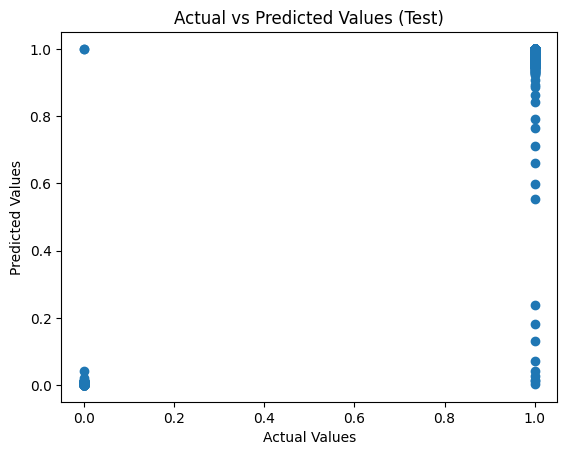

In [30]:
y_pred = best_model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test)')

plt.show()

31/31 [==============================] - 0s 6ms/step


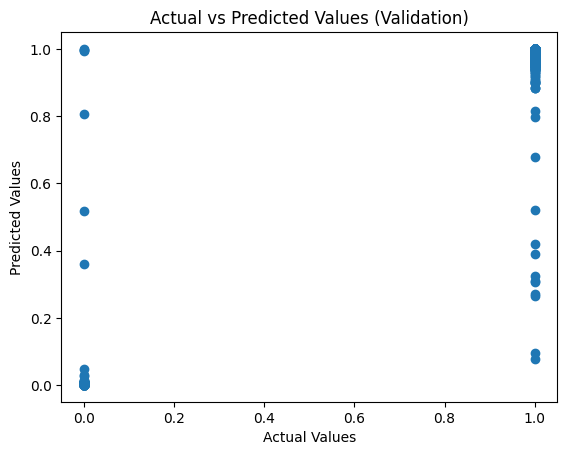

In [31]:
y_pred = best_model.predict(X_validation)

plt.scatter(y_validation, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Validation)')

plt.show()